<a href="https://colab.research.google.com/github/ssbyrne89/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/SEAN_HW_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import math

In [4]:
####### finding mean, variance, and std by hand, no functions
#### MEAN:
sales = [3505,2400,3027,2798,3700,3250,2689]
sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [5]:
total = sum(sales)
sales_mean = total/len(sales)

sales_mean

3052.714285714286

In [6]:
###### VARIANCE:

# write a little function, it's ok
def subtract_mean(number):
  return number-sales_mean

lambda x:x-sales_mean

<function __main__.<lambda>>

In [7]:
#### "map" to apply that function to our list
distances = list(map(subtract_mean, sales))
distances

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [8]:
### NOW SQUARE 'EM

squared_distances = list(map(lambda x: x**2, distances))
squared_distances

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
sales_length = len(squared_distances)


In [10]:
########## NOW ready to calculate variance
sales_variance = sum(squared_distances)/sales_length
print('{:2f}'.format(sales_variance))

183761.061224


In [11]:
######### TIME FOR STANDARD DEVIATION
std_sales = sales_variance**(.5)
std_sales

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [12]:
cust_volumes = [127,80,105,92,120,115,93]

np.cov(sales, cust_volumes)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [0]:
sales_df=pd.DataFrame({'sales':sales})

In [14]:
sales_df['customer_volume'] = pd.Series(cust_volumes)

sales_df


,sales,customer_volume
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [15]:
#### calculating the same covariance but with the data as one DF
sales_df.cov()

,sales,customer_volume
sales,214387.904762,7604.357143
customer_volume,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [16]:
#### TO FIND THE STD, I need the mean,
# then a function to find the variance to find the STD

cust_mean = np.mean(cust_volumes)
cust_mean


104.57142857142857

In [17]:
def subtract_cmean(number):
  return number-cust_mean
lambda x:x-mean-cust_volumes

<function __main__.<lambda>>

In [18]:
cdistances = list(map(subtract_cmean, cust_volumes))
cdistances

[22.42857142857143,
 -24.57142857142857,
 0.4285714285714306,
 -12.57142857142857,
 15.42857142857143,
 10.42857142857143,
 -11.57142857142857]

In [19]:
### Sqaure them

squared_d = list(map(lambda x: x**2, cdistances))
squared_d

[503.0408163265307,
 603.7551020408163,
 0.18367346938775683,
 158.04081632653057,
 238.0408163265307,
 108.75510204081637,
 133.89795918367344]

In [20]:
list_length_cust=len(squared_d)

# now ready to calculate variance

variance_cust = sum(squared_d)/list_length_cust
print('{:2f}'.format(variance_cust))

249.387755


In [21]:
### getting correlation coefficient first with .corr()
sales_df.corr()

,sales,customer_volume
sales,1.000000,0.962834
customer_volume,0.962834,1.000000


In [0]:
### now I'll do the same the long way

std_sales = sales_df['sales'].std(ddof=1)
std_cust = sales_df['customer_volume'].std(ddof=1)

In [23]:
cov_s = sales_df['sales'].cov(sales_df['customer_volume'])
cov_s

7604.357142857142

In [0]:
## now get the denominator

den = std_sales*std_cust

In [25]:
### now calculate the correlation
corr_sales = cov_s/den
corr_sales

0.9628339778148909

In [26]:
### coefficient indicates highly correlated
sales_df['sales'].corr(sales_df['customer_volume'])

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [27]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"

td = pd.read_csv(url)
td.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [28]:
td.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [29]:
td.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# synonym for orthogonal is perpendicular
import matplotlib.pyplot as plt

v1 = np.array([3,-3])
v2 = np.array([-2,-2])

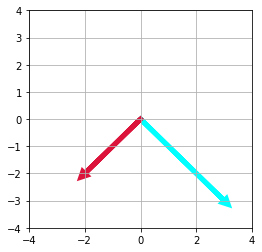

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4,4)
plt.ylim(-4,4)

for myvect, mycolor, width in [(v1, 'cyan', 5), (v2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

In [33]:
np.dot(v1,v2)

# the dot product result is ZERO so the two vectors are orthogonal

0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])

In [86]:
np.square(c)

array([  4, 225,  36, 400])

In [82]:
np.dot(c,c)

665

In [51]:
ct = c.T
(c^ct)*c

array([0, 0, 0, 0])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
d = np.array([7,12])
e = np.array([2,11,-8])

In [0]:
$$ d\times e $$

$$ d\times e $$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [40]:
f = np.array([4,12,11,9,2])
fn = np.linalg.norm(f)

print(fn)

19.131126469708992


In [43]:
fh = f/fn

fh

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [47]:
v_1 = [.7, 1.4]
v_2 = np.multiply(v_1, 2)
print(v_1, '\n', v_2)

[0.7, 1.4] 
 [1.4 2.8]


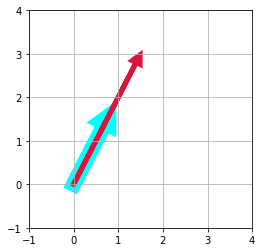

In [49]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,4)          
plt.ylim(-1,4)

for myvect, mycolor, width in [(v_1, 'cyan', 15), (v_2, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [52]:
v11 = np.random.randint(low=-7, high=3, size=2)
v22 = np.random.randint(low=-7, high=3, size=2)
print(v11, '\n', v22)


[ 0 -7] 
 [-7 -4]


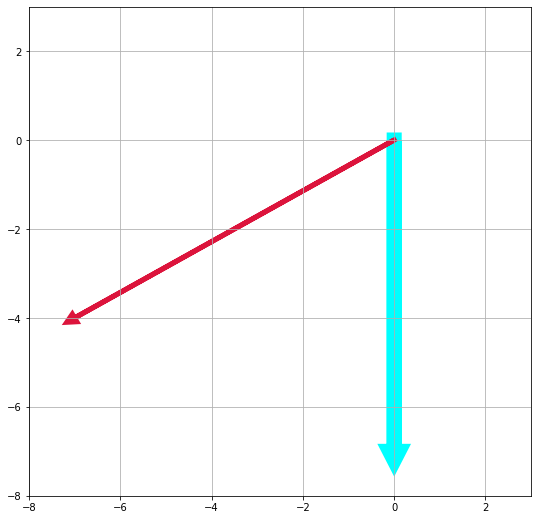

In [53]:
fig, ax = plt.subplots(figsize=(9,9))
ax.grid()
plt.xlim(-8,3)          
plt.ylim(-8,3)

# Plot the vectors
for myvect, mycolor, width in [(v11, 'cyan', 15), (v22, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])

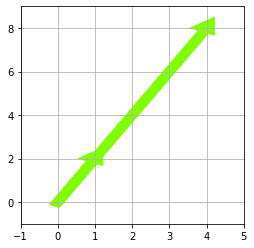

In [60]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,5)          
plt.ylim(-1,9)

# Display
for myvect in [g, h]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='chartreuse')

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l=np.array([1,2,3])
m=np.array([-1,0,7])
n=np.array([4,8,2])

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
v1 = [-3,3]
v2 = [3,3]

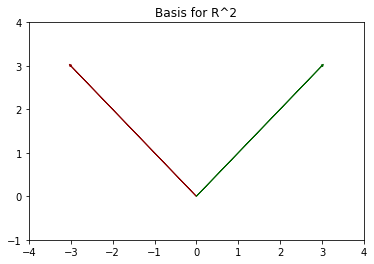

In [72]:
plt.arrow(0,0, v1[0], v1[1], head_width=.05, head_length=0.05, color ='darkred')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='darkgreen')
plt.xlim(-4,4)
plt.ylim(-1,4)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

This is how the vectors look 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [74]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It tells us how many dimensions we're working with

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

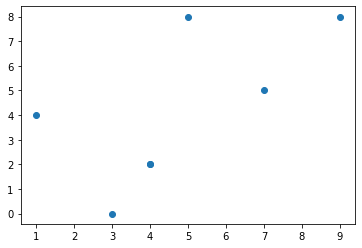

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()